# Weekly Assignment Week 5

The prediction models: Random Forest, Decision Tree and kNN all serve different purposes (Jain, 2015). Random Forest is suitable for situations when we have a large dataset, and interpretability is not a major concern. Also, Random Forest has a higher training time than a single decision tree. You should take this into consideration because as we increase the number of trees in a random forest, the time taken to train each of them also increases (Sharma, 2020).

KNN is unsupervised compared to Decision Tree (DT) which is supervised (Jain, 2015). KNN is mostly used for clustering, DT for classification. KNN determines neighborhoods, so there must be a distance metric. This implies that all the features must be numeric. Distance metrics may be affected by varying scales between attributes and also high-dimensional space.DT, on the other hand, predicts a class for a given input vector. The attributes may be numeric or nominal (Jain, 2015).

According to Jain (2015) KNN is best used to determine similar examples. Where as DT can be used to classify examples. 



# Data pre-processing

In [24]:
import seaborn as sns
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression #remember, this is the linear regression model from sk-learn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split #We need this to split the data

In [25]:
df = pd.read_csv("voice.csv", engine='python') 
df.info()
df.head() # this shows the head of the dataframe in the output

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


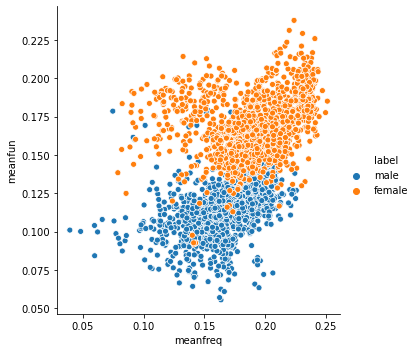

In [100]:
sns.relplot(x='meanfreq',y='meanfun',hue='label',data=df)

In [73]:
dummy = pd.get_dummies(df["label"])
df = pd.concat([df, dummy], axis=1)

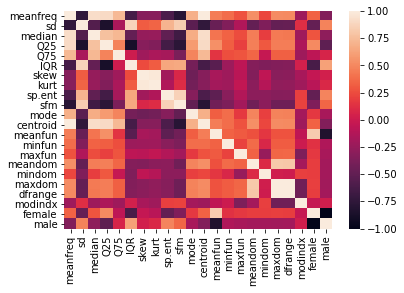

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,female,male
meanfreq,1.000000,-0.739039,0.925445,0.911416,0.740997,-0.627605,-0.322327,-0.316036,-0.601203,-0.784332,...,0.460844,0.383937,0.274004,0.536666,0.229261,0.519528,0.515570,-0.216979,0.337415,-0.337415
sd,-0.739039,1.000000,-0.562603,-0.846931,-0.161076,0.874660,0.314597,0.346241,0.716620,0.838086,...,-0.466281,-0.345609,-0.129662,-0.482726,-0.357667,-0.482278,-0.475999,0.122660,-0.479539,0.479539
median,0.925445,-0.562603,1.000000,0.774922,0.731849,-0.477352,-0.257407,-0.243382,-0.502005,-0.661690,...,0.414909,0.337602,0.251328,0.455943,0.191169,0.438919,0.435621,-0.213298,0.283919,-0.283919
Q25,0.911416,-0.846931,0.774922,1.000000,0.477140,-0.874189,-0.319475,-0.350182,-0.648126,-0.766875,...,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,0.454394,-0.141377,0.511455,-0.511455
Q75,0.740997,-0.161076,0.731849,0.477140,1.000000,0.009636,-0.206339,-0.148881,-0.174905,-0.378198,...,0.155091,0.258002,0.285584,0.359181,-0.023750,0.335114,0.335648,-0.216475,-0.066906,0.066906
IQR,-0.627605,0.874660,-0.477352,-0.874189,0.009636,1.000000,0.249497,0.316185,0.640813,0.663601,...,-0.534462,-0.222680,-0.069588,-0.333362,-0.357037,-0.337877,-0.331563,0.041252,-0.618916,0.618916
skew,-0.322327,0.314597,-0.257407,-0.319475,-0.206339,0.249497,1.000000,0.977020,-0.195459,0.079694,...,-0.167668,-0.216954,-0.080861,-0.336848,-0.061608,-0.305651,-0.304640,-0.169325,-0.036627,0.036627
kurt,-0.316036,0.346241,-0.243382,-0.350182,-0.148881,0.316185,0.977020,1.000000,-0.127644,0.109884,...,-0.194560,-0.203201,-0.045667,-0.303234,-0.103313,-0.274500,-0.272729,-0.205539,-0.087195,0.087195
sp.ent,-0.601203,0.716620,-0.502005,-0.648126,-0.174905,0.640813,-0.195459,-0.127644,1.000000,0.866411,...,-0.513194,-0.305826,-0.120738,-0.293562,-0.294869,-0.324253,-0.319054,0.198074,-0.490552,0.490552
sfm,-0.784332,0.838086,-0.661690,-0.766875,-0.378198,0.663601,0.079694,0.109884,0.866411,1.000000,...,-0.421066,-0.362100,-0.192369,-0.428442,-0.289593,-0.436649,-0.431580,0.211477,-0.357499,0.357499


In [74]:
corr = df.corr() #I'm leaving out the corrected variables (divided by 1 million)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns) #the last two arguments set the column names
plt.show()
corr

In [77]:
df_sub = df[["meanfreq","sd","meanfun", "Q25", "Q75", "centroid", "median", "female"]]
df_sub.head()

,meanfreq,sd,meanfun,Q25,Q75,centroid,median,female
0,0.059781,0.064241,0.084279,0.015071,0.090193,0.059781,0.032027,0
1,0.066009,0.067310,0.107937,0.019414,0.092666,0.066009,0.040229,0
2,0.077316,0.083829,0.098706,0.008701,0.131908,0.077316,0.036718,0
3,0.151228,0.072111,0.088965,0.096582,0.207955,0.151228,0.158011,0
4,0.135120,0.079146,0.106398,0.078720,0.206045,0.135120,0.124656,0


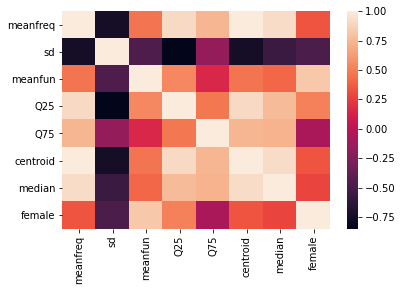

,meanfreq,sd,meanfun,Q25,Q75,centroid,median,female
meanfreq,1.000000,-0.739039,0.460844,0.911416,0.740997,1.000000,0.925445,0.337415
sd,-0.739039,1.000000,-0.466281,-0.846931,-0.161076,-0.739039,-0.562603,-0.479539
meanfun,0.460844,-0.466281,1.000000,0.545035,0.155091,0.460844,0.414909,0.833921
Q25,0.911416,-0.846931,0.545035,1.000000,0.477140,0.911416,0.774922,0.511455
Q75,0.740997,-0.161076,0.155091,0.477140,1.000000,0.740997,0.731849,-0.066906
centroid,1.000000,-0.739039,0.460844,0.911416,0.740997,1.000000,0.925445,0.337415
median,0.925445,-0.562603,0.414909,0.774922,0.731849,0.925445,1.000000,0.283919
female,0.337415,-0.479539,0.833921,0.511455,-0.066906,0.337415,0.283919,1.000000


In [78]:
corr = df_sub.corr() #I'm leaving out the corrected variables (divided by 1 million)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns) #the last two arguments set the column names
plt.show()
corr

In [79]:
#sns.pairplot(df_sub)
#plt.show()

# Build the model

In [80]:
X = df_sub[["meanfreq","sd","meanfun", "Q25", "Q75", "centroid", "median"]] #create the X matrix

y = df_sub["female"] #create the y-variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, store it into different variables

X_train.head() #show the head of the training set

,meanfreq,sd,meanfun,Q25,Q75,centroid,median
1866,0.141083,0.088698,0.174179,0.043235,0.217778,0.141083,0.179804
767,0.167021,0.057011,0.100181,0.106603,0.207457,0.167021,0.187109
2862,0.234486,0.034413,0.179095,0.223822,0.252357,0.234486,0.240764
1064,0.197073,0.057609,0.138659,0.138016,0.243843,0.197073,0.217386
270,0.142018,0.071383,0.108932,0.094235,0.202899,0.142018,0.139775


# Evaluate the model

In [81]:
from sklearn.neighbors import KNeighborsClassifier #the object class we need

knn = KNeighborsClassifier(n_neighbors=5) #create a KNN-classifier with 3 neighbors
knn = knn.fit(X_train, y_train) #this fits the k-nearest neigbor model with the train data

In [82]:
knn.score(X_test, y_test) #calculate the fit on the *test* data

0.9779179810725552

Accuracy is 97.7%. Compared to the baseline guess the model is ...

## Confusion Matrix

In [85]:
from sklearn.metrics import confusion_matrix
y_test_pred = knn.predict(X_test) #the predicted values
cm = confusion_matrix(y_test, y_test_pred) #creates a "confusion matrix"
cm

array([[481,  13],
       [  8, 449]])

In [86]:
knn.classes_

array([0, 1], dtype=uint8)

In [87]:
conf_matrix = pd.DataFrame(cm, index=['Female (actual)', 'Male (actual)'], columns = ['Female (predicted)', 'Male (predicted)']) #make a dataframe, put labels on rows (index) and columns 
conf_matrix

,Female (predicted),Male (predicted)
Female (actual),481,13
Male (actual),8,449


# Let's do the math

## Accuracy

When calculating the accuracy, the following formula applies: $(predictedright)/ (totalpredicted) = accuracy$

In [89]:
(481+449)/(481+13+8+449)

0.9779179810725552

The accuracy is 97.7% as confirmed during the model evaluation

## Precision
The precision for the predicted females is callculated. This is the number of correctly predicted females, divided by the total number of predicted females.

In [94]:
481/(481+8) # Precision for predicting a female

0.983640081799591

In [93]:
449/(449+13) # Precision for predicting a male

0.9718614718614719

Precision for predicting a female is 98.3% <br>
Precision for predicting a male is 97.1%

# Recall
This is the number of correctly predicted females, divided by the total number of actual females.

In [96]:
481/(481+13) # Recall for predicting a female

0.9736842105263158

In [97]:
449/(449+8) # Recall for predicting a male

0.9824945295404814

The recall for predicting a female is 97.3%. <br>
The recall for predicting a male is 98.2%. 

# Parameter settings
As discussed during the lecture it can be beneficial to test-out different parameters for the model. To achieve this efficiently the built-in funcion classification_report from sklearn can be consulted to quickly calculate the accuracy, precision and recall. 

In [98]:
from sklearn.metrics import classification_report

for i in range(1,11):
    knn_new = KNeighborsClassifier(n_neighbors = i) #make a new kNN model with i (1-10) neighbors
    knn_new = knn_new.fit(X_train, y_train) #fit new model on train data
    y_test_pred_new = knn_new.predict(X_test) #predict using new model, with test data
    print(f"With {i} neighbors the result is:")
    print(classification_report(y_test, y_test_pred_new)) #use a built-in function to print out accuracy, precision and recall

With 1 neighbors the result is:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       494
           1       0.96      0.98      0.97       457

    accuracy                           0.97       951
   macro avg       0.97      0.97      0.97       951
weighted avg       0.97      0.97      0.97       951

With 2 neighbors the result is:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       494
           1       0.97      0.96      0.97       457

    accuracy                           0.97       951
   macro avg       0.97      0.97      0.97       951
weighted avg       0.97      0.97      0.97       951

With 3 neighbors the result is:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       494
           1       0.97      0.98      0.97       457

    accuracy                           0.97       951
   macro avg       0.97      0.9

The scores are very close together. However, 6 or 7 neighbors seems to have the best result.

# References

Jain, D. [Darshan Jain]. (2015, 5 december). Decision tree vs. KNN [Forumpost]. Data Science Stack Exchange. https://datascience.stackexchange.com/questions/9228/decision-tree-vs-knn

Sharma, A. (2020, 12 mei). Decision Tree vs. Random Forest – Which Algorithm Should you Use? Analytics Vidhya. https://www.analyticsvidhya.com/blog/2020/05/decision-tree-vs-random-forest-algorithm/